In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
#loading the csv file containing our dataset 
#we choose to skip the lines where there were more than 12 fields (4 lines)
df = pd.read_csv("books.csv",sep=",",on_bad_lines='warn', encoding = 'utf-8')

Skipping line 3350: expected 12 fields, saw 13
Skipping line 4704: expected 12 fields, saw 13
Skipping line 5879: expected 12 fields, saw 13
Skipping line 8981: expected 12 fields, saw 13



## Exploratory analysis

In [3]:
#dataframe
df

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,0439785960,9780439785969,eng,652,2095690,27591,9/16/2006,Scholastic Inc.
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,0439358078,9780439358071,eng,870,2153167,29221,9/1/2004,Scholastic Inc.
2,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,0439554896,9780439554893,eng,352,6333,244,11/1/2003,Scholastic
3,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,043965548X,9780439655484,eng,435,2339585,36325,5/1/2004,Scholastic Inc.
4,8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,4.78,0439682584,9780439682589,eng,2690,41428,164,9/13/2004,Scholastic
...,...,...,...,...,...,...,...,...,...,...,...,...
11118,45631,Expelled from Eden: A William T. Vollmann Reader,William T. Vollmann/Larry McCaffery/Michael He...,4.06,1560254416,9781560254416,eng,512,156,20,12/21/2004,Da Capo Press
11119,45633,You Bright and Risen Angels,William T. Vollmann,4.08,0140110879,9780140110876,eng,635,783,56,12/1/1988,Penguin Books
11120,45634,The Ice-Shirt (Seven Dreams #1),William T. Vollmann,3.96,0140131965,9780140131963,eng,415,820,95,8/1/1993,Penguin Books
11121,45639,Poor People,William T. Vollmann,3.72,0060878827,9780060878825,eng,434,769,139,2/27/2007,Ecco


In [4]:
#visualization of first ten lines of the dataframe
df.head(10)

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,0439785960,9780439785969,eng,652,2095690,27591,9/16/2006,Scholastic Inc.
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,0439358078,9780439358071,eng,870,2153167,29221,9/1/2004,Scholastic Inc.
2,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,0439554896,9780439554893,eng,352,6333,244,11/1/2003,Scholastic
3,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,043965548X,9780439655484,eng,435,2339585,36325,5/1/2004,Scholastic Inc.
4,8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,4.78,0439682584,9780439682589,eng,2690,41428,164,9/13/2004,Scholastic
5,9,"Unauthorized Harry Potter Book Seven News: ""Ha...",W. Frederick Zimmerman,3.74,0976540606,9780976540601,en-US,152,19,1,4/26/2005,Nimble Books
6,10,Harry Potter Collection (Harry Potter #1-6),J.K. Rowling,4.73,0439827604,9780439827607,eng,3342,28242,808,9/12/2005,Scholastic
7,12,The Ultimate Hitchhiker's Guide: Five Complete...,Douglas Adams,4.38,0517226952,9780517226957,eng,815,3628,254,11/1/2005,Gramercy Books
8,13,The Ultimate Hitchhiker's Guide to the Galaxy ...,Douglas Adams,4.38,0345453743,9780345453747,eng,815,249558,4080,4/30/2002,Del Rey Books
9,14,The Hitchhiker's Guide to the Galaxy (Hitchhik...,Douglas Adams,4.22,1400052920,9781400052929,eng,215,4930,460,8/3/2004,Crown


In [5]:
#visualization of the 10 last lines of the dataframe
df.tail(10)

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
11113,45617,O Cavalo e o Seu Rapaz (As Crónicas de Nárnia ...,C.S. Lewis/Pauline Baynes/Ana Falcão Bastos,3.92,9722330551,9789722330558,por,160,207,16,8/15/2003,Editorial Presença
11114,45623,O Sobrinho do Mágico (As Crónicas de Nárnia #1),C.S. Lewis/Pauline Baynes/Ana Falcão Bastos,4.04,9722329987,9789722329989,por,147,396,37,4/8/2003,Editorial Presença
11115,45625,A Viagem do Caminheiro da Alvorada (As Crónica...,C.S. Lewis/Pauline Baynes/Ana Falcão Bastos,4.09,9722331329,9789722331326,por,176,161,14,9/1/2004,Editorial Presença
11116,45626,O Príncipe Caspian (As Crónicas de Nárnia #4),C.S. Lewis/Pauline Baynes/Ana Falcão Bastos,3.97,9722330977,9789722330978,por,160,215,11,10/11/2003,Editorial Presença
11117,45630,Whores for Gloria,William T. Vollmann,3.69,0140231579,9780140231571,en-US,160,932,111,2/1/1994,Penguin Books
11118,45631,Expelled from Eden: A William T. Vollmann Reader,William T. Vollmann/Larry McCaffery/Michael He...,4.06,1560254416,9781560254416,eng,512,156,20,12/21/2004,Da Capo Press
11119,45633,You Bright and Risen Angels,William T. Vollmann,4.08,0140110879,9780140110876,eng,635,783,56,12/1/1988,Penguin Books
11120,45634,The Ice-Shirt (Seven Dreams #1),William T. Vollmann,3.96,0140131965,9780140131963,eng,415,820,95,8/1/1993,Penguin Books
11121,45639,Poor People,William T. Vollmann,3.72,0060878827,9780060878825,eng,434,769,139,2/27/2007,Ecco
11122,45641,Las aventuras de Tom Sawyer,Mark Twain,3.91,8497646983,9788497646987,spa,272,113,12,5/28/2006,Edimat Libros


In [6]:
#We choose to drop 'bookID', 'isbn' and 'isbn13' as they are not interesting for the training
df = df.drop(columns =['bookID','isbn','isbn13'])

In [7]:
#statistical description of numerical data
df.describe()

,average_rating,num_pages,ratings_count,text_reviews_count
count,11123.000000,11123.000000,1.112300e+04,11123.000000
mean,3.934075,336.405556,1.794285e+04,542.048099
std,0.350485,241.152626,1.124992e+05,2576.619589
min,0.000000,0.000000,0.000000e+00,0.000000
25%,3.770000,192.000000,1.040000e+02,9.000000
50%,3.960000,299.000000,7.450000e+02,47.000000
75%,4.140000,416.000000,5.000500e+03,238.000000
max,5.000000,6576.000000,4.597666e+06,94265.000000


In [8]:
#description of literal data 
df.describe(include='object')

,title,authors,language_code,publication_date,publisher
count,11123,11123,11123,11123,11123
unique,10348,6639,27,3679,2290
top,The Iliad,Stephen King,eng,10/1/2005,Vintage
freq,9,40,8908,56,318


In [9]:
#checking if there are missing values 
df.isna().sum()

title                 0
authors               0
average_rating        0
language_code         0
  num_pages           0
ratings_count         0
text_reviews_count    0
publication_date      0
publisher             0
dtype: int64

In [10]:
#the name of the column num_pages contained a space in the beginning and we choose to remove this space 
df = df.rename(columns = {'  num_pages': 'num_pages'})

In [11]:
#checking types of different columns 
df.dtypes

title                  object
authors                object
average_rating        float64
language_code          object
num_pages               int64
ratings_count           int64
text_reviews_count      int64
publication_date       object
publisher              object
dtype: object

Text(0.5, 1.0, 'Top 20 authors with the most books written and their average rating')

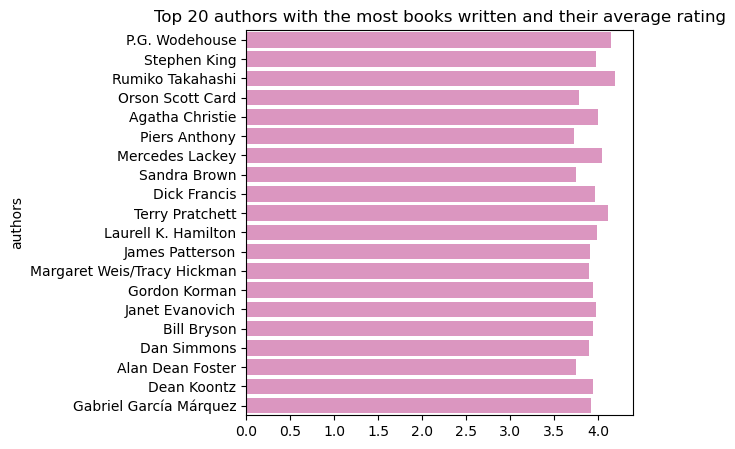

In [12]:
#display top 20 authors sorted by number of books written as function of average rating 
authors_df = df.groupby('authors').agg({'title':'size', 'average_rating':'mean'}).reset_index()
top_20_authors_title = authors_df.sort_values(['title', 'average_rating'], ascending = [False, False]).head(20)
fig, axes = plt.subplots(1, 1, figsize=(5, 5))
authors_plot = sns.barplot(ax=axes, y= top_20_authors_title["authors"], x=top_20_authors_title["average_rating"], palette=["#E78AC3"])
authors_plot.set(xlabel = None)
axes.set_title("Top 20 authors with the most books written and their average rating")

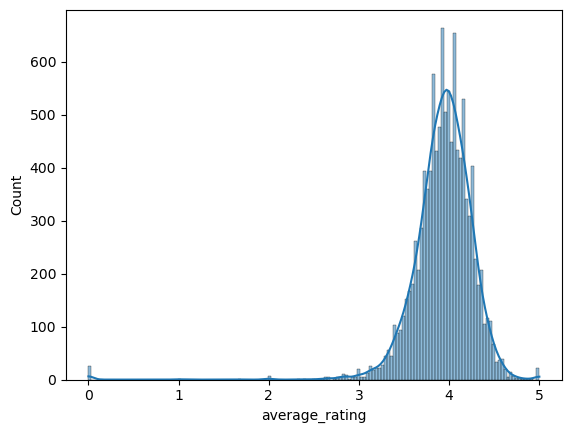

In [13]:
#repartition of average rating
sns.histplot(x="average_rating",data=df,kde=True)
plt.show()

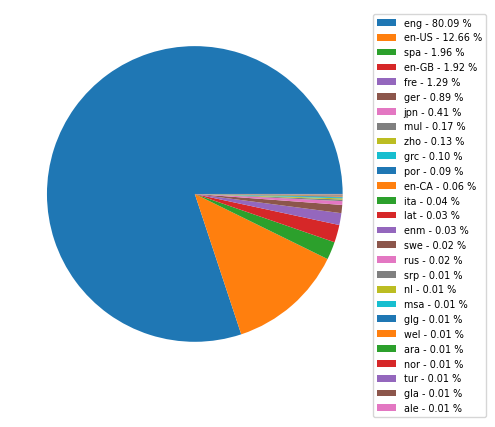

In [14]:
#language repartition among the books
x = df.language_code.value_counts().reset_index(name='count').sort_values(['count'],ascending=False)
x_list = pd.Series(x['index'])

y = df.language_code.value_counts()
percent = y/y.sum()*100

patches, texts = plt.pie(percent,radius=1)
labels= ['{0} - {1:1.2f} %'.format(i,j) for i,j in zip(x_list,percent)]

plt.legend(patches, labels,bbox_to_anchor=(0.3,0.5,1,0.5),fontsize = 'x-small')
plt.show()

In [15]:
#average rating statistics according to languages 
df.groupby(['language_code']).describe().average_rating.sort_values("mean",ascending=False)

,count,mean,std,min,25%,50%,75%,max
language_code,,,,,,,,
wel,1.0,5.000000,NaN,5.00,5.0000,5.000,5.0000,5.00
gla,1.0,4.470000,NaN,4.47,4.4700,4.470,4.4700,4.47
zho,14.0,4.456429,0.218442,3.79,4.4550,4.555,4.5700,4.60
tur,1.0,4.420000,NaN,4.42,4.4200,4.420,4.4200,4.42
ale,1.0,4.360000,NaN,4.36,4.3600,4.360,4.3600,4.36
lat,3.0,4.353333,0.160728,4.17,4.2950,4.420,4.4450,4.47
jpn,46.0,4.268696,0.165417,3.68,4.2325,4.270,4.2975,4.57
rus,2.0,4.255000,0.063640,4.21,4.2325,4.255,4.2775,4.30
nl,1.0,4.180000,NaN,4.18,4.1800,4.180,4.1800,4.18


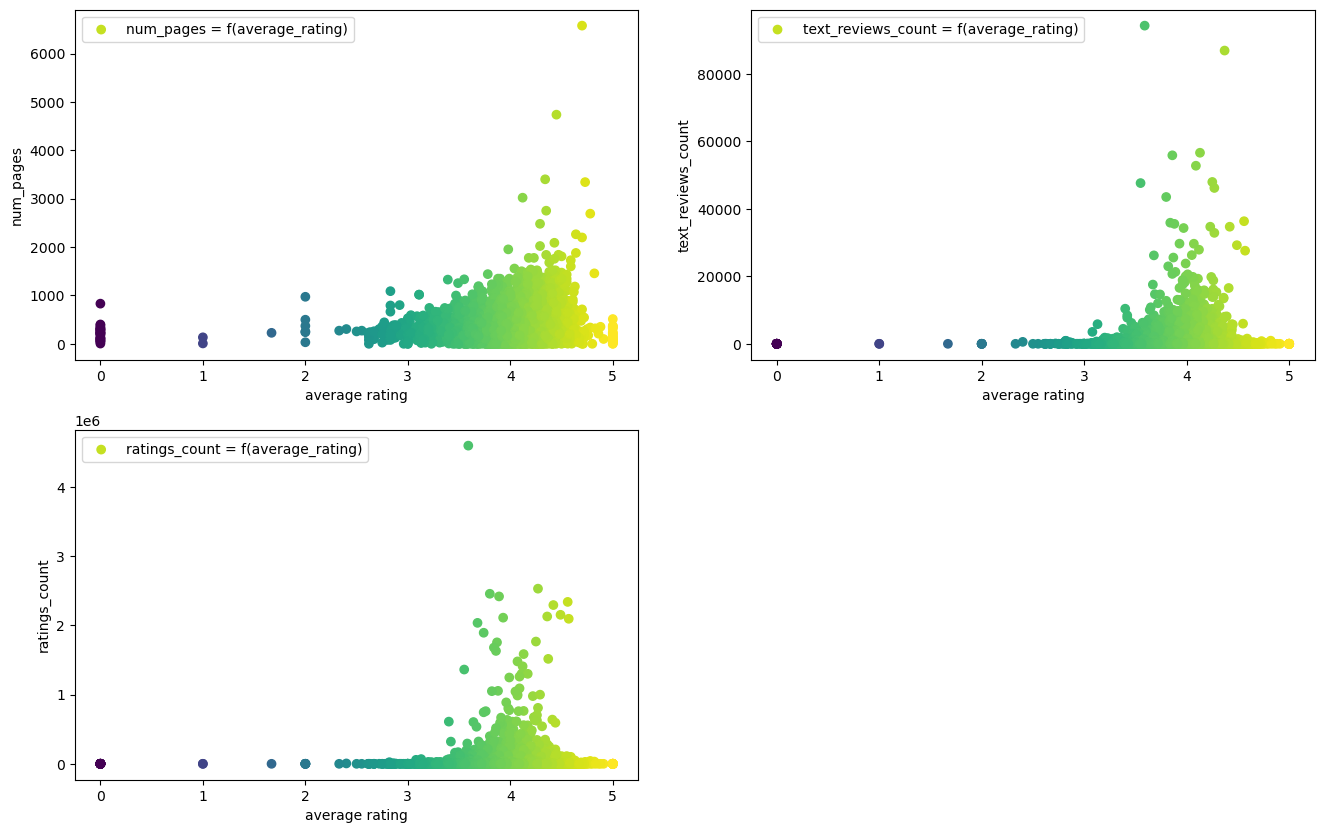

In [16]:
#number of pages, text reviews count and ratings count repartitions according to average rating 
plt.figure(figsize=(16,10))
plt.subplot(2,2,1)

y=df.loc[:,"num_pages"]
x=df.loc[:,"average_rating"]
plt.scatter(x,y, c=x,label="num_pages = f(average_rating)")
plt.xlabel(xlabel="average rating")
plt.ylabel(ylabel="num_pages")
plt.legend()

plt.subplot(2,2,2)
y=df.loc[:,"text_reviews_count"]
x=df.loc[:,"average_rating"]
plt.scatter(x,y, c=x,label="text_reviews_count = f(average_rating)")
plt.xlabel(xlabel="average rating")
plt.ylabel(ylabel="text_reviews_count")
plt.legend()

plt.subplot(2,2,3)
y=df.loc[:,"ratings_count"]
x=df.loc[:,"average_rating"]
plt.scatter(x,y, c=x,label="ratings_count = f(average_rating)")
plt.xlabel(xlabel="average rating")
plt.ylabel(ylabel="ratings_count")
plt.legend()

[Text(0.5, 0, 'average rating'), Text(0, 0.5, 'publisher')]

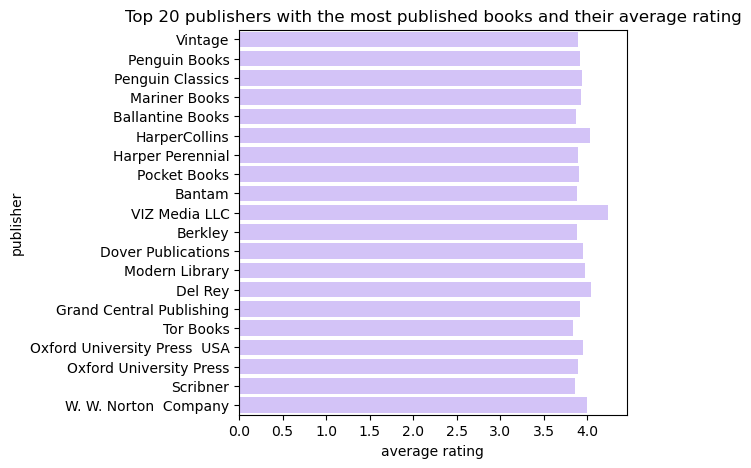

In [17]:
#Top 20 publishers sorted by number of published books as function of average rating 

publisher_df = df.groupby('publisher').agg({'title':'size', 'average_rating':'mean', 'ratings_count':'sum'}).reset_index()
fig, axes = plt.subplots(1, 1, figsize=(5, 5))
top_20_publisher_1 = publisher_df.sort_values(['title', 'average_rating'], ascending = [False, False]).head(20)
publisher_plot = sns.barplot(ax=axes, y= top_20_publisher_1["publisher"], x=top_20_publisher_1["average_rating"], palette=['#d0bbff'])
publisher_plot.set(xlabel = None)
axes.set_title("Top 20 publishers with the most published books and their average rating")
axes.set(xlabel='average rating', ylabel="publisher")

In [18]:
#To investigate books with 0 pages 
df.loc[(df.num_pages==0)]

,title,authors,average_rating,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
306,The 5 Love Languages / The 5 Love Languages Jo...,Gary Chapman,4.70,eng,0,22,4,1/1/2005,Moody Publishers
853,The Tragedy of Pudd'nhead Wilson,Mark Twain/Michael Prichard,3.79,eng,0,3,0,1/1/2003,Tantor Media
1061,Murder by Moonlight & Other Mysteries (New Adv...,NOT A BOOK,4.00,eng,0,7,2,10/3/2006,Simon Schuster Audio
1064,The Unfortunate Tobacconist & Other Mysteries ...,NOT A BOOK,3.50,eng,0,12,1,10/1/2003,Simon & Schuster Audio
1230,The Da Vinci Code (Robert Langdon #2),Dan Brown/Paul Michael,3.84,eng,0,91,16,3/28/2006,Random House Audio
...,...,...,...,...,...,...,...,...,...
10026,The Chessmen of Mars (Barsoom #5),Edgar Rice Burroughs/John Bolen,3.83,eng,0,5147,157,1/1/2005,Tantor Media
10188,Fine Lines (One-Eyed Mack #6),Jim Lehrer,3.23,eng,0,17,4,11/19/1995,Random House Value Publishing
10620,Stowaway and Milk Run: Two Unabridged Stories ...,Mary Higgins Clark/Jan Maxwell,3.49,eng,0,64,2,12/1/1999,Simon & Schuster Audio
10922,The Mask of the Enchantress,Victoria Holt,3.85,eng,0,21,1,10/12/1981,Ivy Books


In [19]:
#we wanted to check if there is a significant difference between audio books and actual books for numerical data 

In [20]:
#average rating among manuscript books
df.loc[df.num_pages!=0].mean(numeric_only=True)

average_rating            3.934135
num_pages               338.719924
ratings_count         18063.683443
text_reviews_count      545.676021
dtype: float64

In [21]:
#average rating among audio books
df.loc[df.num_pages==0].mean(numeric_only=True)

average_rating          3.925395
num_pages               0.000000
ratings_count         378.789474
text_reviews_count     14.710526
dtype: float64

In [22]:
#books rated 0 due to the absence of rating count and text review count 
df[(df['average_rating']== 0)&(df['text_reviews_count']== 0)&(df['ratings_count']== 0)]

,title,authors,average_rating,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
265,Out to Eat London 2002 (Lonely Planet Out to Eat),Lonely Planet/Mark Honan,0.0,eng,295,0,0,9/1/2001,Lonely Planet
375,Juiced Official Strategy Guide,Doug Walsh,0.0,eng,112,0,0,6/1/2005,BradyGames
987,Open City 6: The Only Woman He Ever Left,Open City Magazine/James Purdy/Daniel Pinchbec...,0.0,eng,200,0,0,10/13/2000,Grove Press Open City Books
2532,How To Meditate: An Anthology Of Talks On Medi...,Frederick P. Lenz,0.0,eng,228,0,0,1/1/2004,Frederick P. Lenz Foundation for American Budd...
2533,Insights: Talks On The Nature Of Existence,Frederick P. Lenz,0.0,eng,304,0,0,1/1/2003,Frederick P. Lenz Foundation for American Budd...
2758,Venac sonetnih venaca; Puževa srma,Dobrica Erić,0.0,srp,222,0,0,1/1/1996,"Izdavačka agencija ""Draganić"""
3492,Brodie's notes on Aldous Huxley's brave new world,Graham Handley,0.0,eng,71,0,0,8/20/1992,Macmillan
4241,American Film Guide,Frank N. Magill,0.0,eng,5,0,0,1/1/1983,Salem Press Inc
4677,The Man and the Author: John Milton: Twentieth...,J. Martin Evans,0.0,eng,386,0,0,11/8/2002,Routledge
5323,Canopy: A Work for Voice and Light in Harvard ...,David Ward/Parveen Adams/Seamus Heaney/Ivan ...,0.0,eng,63,0,0,12/31/1997,Arts Publications


## Feature engineering and selection

In [23]:
#duplicate the original dataframe to do feature engineering
df_processed=df.copy()

In [24]:
##English is the most represented language 
#we decided to regroup all english books together
df_processed=df_processed.replace(['en-US','en-GB','en-CA'],'eng')

#### we give an id for language_code, an id for each author and publisher

In [25]:
#we decided to give a language_id to split languages into 5 categories
df_processed['language_id'] = 5
df_processed.loc[df['language_code'] == 'eng', 'language_id'] = 1
df_processed.loc[df['language_code'] == 'fre', 'language_id'] = 2
df_processed.loc[df['language_code'] == 'spa', 'language_id'] = 3
df_processed.loc[df['language_code'] == 'ger', 'language_id'] = 4

In [26]:
#create an unique id for each publisher and author
df_processed['Publisher_ID']=df_processed.groupby(['publisher']).ngroup().astype(int)
df_processed['author_ID']=df_processed.groupby(['authors']).ngroup().astype(int)

In [27]:
df_processed

,title,authors,average_rating,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher,language_id,Publisher_ID,author_ID
0,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,eng,652,2095690,27591,9/16/2006,Scholastic Inc.,1,1778,2626
1,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,eng,870,2153167,29221,9/1/2004,Scholastic Inc.,1,1778,2626
2,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,eng,352,6333,244,11/1/2003,Scholastic,1,1773,2622
3,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,eng,435,2339585,36325,5/1/2004,Scholastic Inc.,1,1778,2626
4,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,4.78,eng,2690,41428,164,9/13/2004,Scholastic,1,1773,2626
...,...,...,...,...,...,...,...,...,...,...,...,...
11118,Expelled from Eden: A William T. Vollmann Reader,William T. Vollmann/Larry McCaffery/Michael He...,4.06,eng,512,156,20,12/21/2004,Da Capo Press,1,497,6556
11119,You Bright and Risen Angels,William T. Vollmann,4.08,eng,635,783,56,12/1/1988,Penguin Books,1,1485,6555
11120,The Ice-Shirt (Seven Dreams #1),William T. Vollmann,3.96,eng,415,820,95,8/1/1993,Penguin Books,1,1485,6555
11121,Poor People,William T. Vollmann,3.72,eng,434,769,139,2/27/2007,Ecco,1,612,6555


#### We drop the outliers (> 4000 pages) and books without average rating, rating count and text review

In [28]:
df_processed = df_processed.drop(df[(df['num_pages'] > 4000)].index)
df_processed = df_processed.drop(df[(df['average_rating']== 0)&(df['text_reviews_count']== 0)&(df['ratings_count']== 0)].index)
print('number of lines in the dataset :', len(df_processed))

number of lines in the dataset : 11097


#### Edition Year

In [29]:
#extracting publication year 
def year_publication(publication_date):
    return int(publication_date.split("/")[-1])

In [30]:
#inserting year_publication column
df_processed.loc[:,"year_publication"] = df_processed.loc[:,"publication_date"].apply(year_publication)
df_processed

,title,authors,average_rating,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher,language_id,Publisher_ID,author_ID,year_publication
0,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,eng,652,2095690,27591,9/16/2006,Scholastic Inc.,1,1778,2626,2006
1,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,eng,870,2153167,29221,9/1/2004,Scholastic Inc.,1,1778,2626,2004
2,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,eng,352,6333,244,11/1/2003,Scholastic,1,1773,2622,2003
3,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,eng,435,2339585,36325,5/1/2004,Scholastic Inc.,1,1778,2626,2004
4,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,4.78,eng,2690,41428,164,9/13/2004,Scholastic,1,1773,2626,2004
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11118,Expelled from Eden: A William T. Vollmann Reader,William T. Vollmann/Larry McCaffery/Michael He...,4.06,eng,512,156,20,12/21/2004,Da Capo Press,1,497,6556,2004
11119,You Bright and Risen Angels,William T. Vollmann,4.08,eng,635,783,56,12/1/1988,Penguin Books,1,1485,6555,1988
11120,The Ice-Shirt (Seven Dreams #1),William T. Vollmann,3.96,eng,415,820,95,8/1/1993,Penguin Books,1,1485,6555,1993
11121,Poor People,William T. Vollmann,3.72,eng,434,769,139,2/27/2007,Ecco,1,612,6555,2007


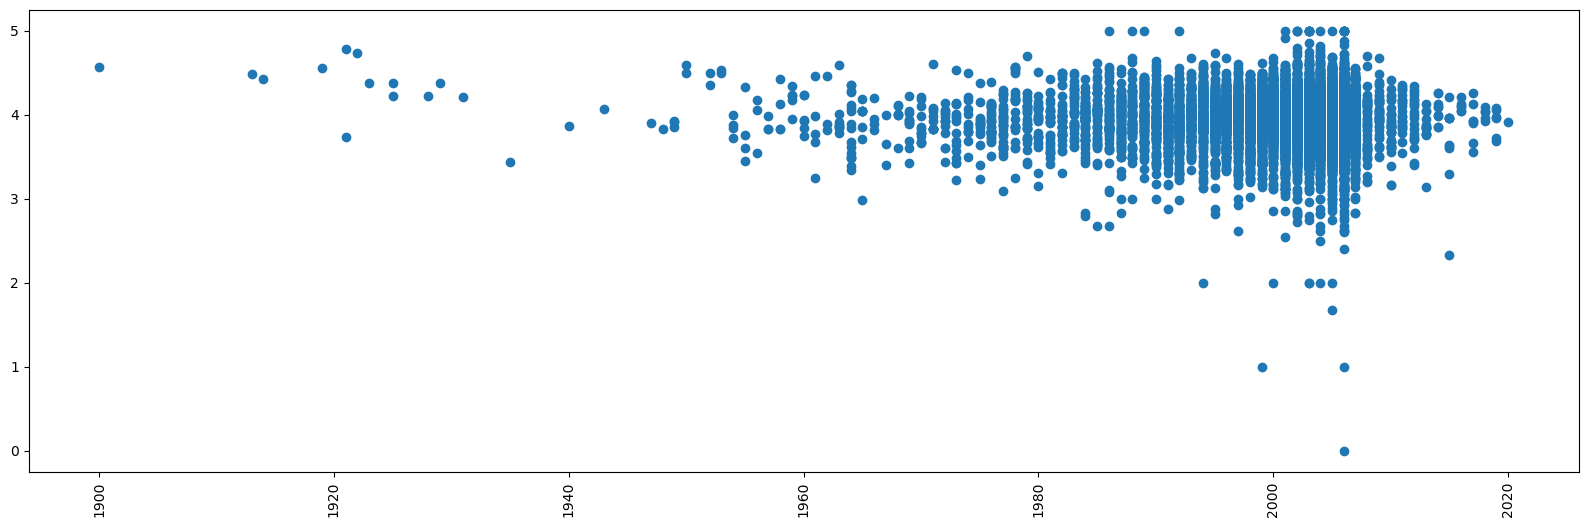

In [31]:
#Average_rating as function of publication years
plt.figure(figsize=(20,6))

x=df_processed.loc[:,"year_publication"].sort_values(ascending=True)
y=df_processed.loc[:,"average_rating"]
plt.xticks(rotation=90)
plt.scatter(x, y,alpha=1)
plt.show()

In [32]:
#Introducing target column for classification 
category =pd.cut(df_processed.average_rating,bins=[-1,3,3.5,4.5,5.01],labels=[1,2,3,4])
df_processed.insert(3,'category',category)

In [33]:
#Converting category column type as integers
df_processed['category']=df_processed.category.astype(int)

In [34]:
df_processed.groupby(['category']).describe()

average_rating                                                    \
                  count      mean       std   min   25%   50%    75%  max   
category                                                                    
1                  79.0  2.681646  0.508122  0.00  2.67  2.83  2.985  3.0   
2                 688.0  3.367238  0.115350  3.02  3.31  3.40  3.460  3.5   
3               10142.0  3.978275  0.222153  3.51  3.82  3.98  4.140  4.5   
4                 188.0  4.645691  0.149441  4.51  4.55  4.59  4.675  5.0   

         num_pages              ... author_ID         year_publication  \
             count        mean  ...       75%     max            count   
category                        ...                                      
1             79.0  251.607595  ...   4933.00  6592.0             79.0   
2            688.0  283.431686  ...   4787.50  6614.0            688.0   
3          10142.0  338.097417  ...   5011.75  6638.0          10142.0   
4            188.0  431.031915  ...   4302.75  6598.0            188.0   

                                                                          
                 mean        std     min     25%     50%     75%     max  
category                                                                  
1         1999.949367  10.362530  1931.0  1998.0  2003.0  2005.0  2016.0  
2         2001.345930   7.015648  1964.0  1999.0  2004.0  2006.0  2019.0  
3         2000.091599   8.282698  1900.0  1998.0  2003.0  2005.0  2020.0  
4         2000.462766   9.229904  1922.0  1999.0  2004.0  2005.0  2012.0  

[4 rows x 64 columns]

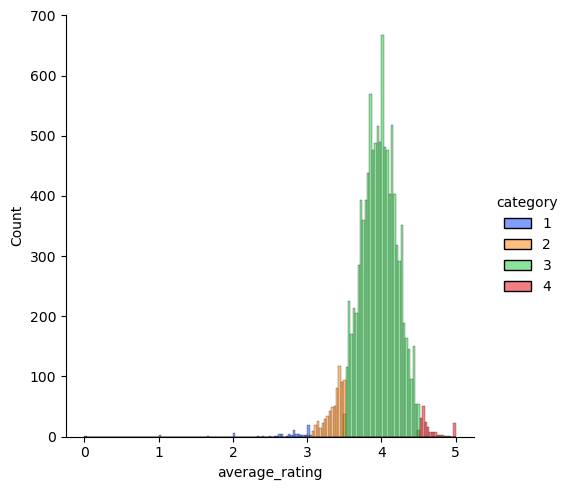

In [35]:
#categories repartition
sns.displot(data=df_processed,x="average_rating",hue="category", palette="bright")

C:\Users\sivat\AppData\Local\Temp\ipykernel_4444\1674759157.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_processed.corr(),annot=True)


<Axes: >

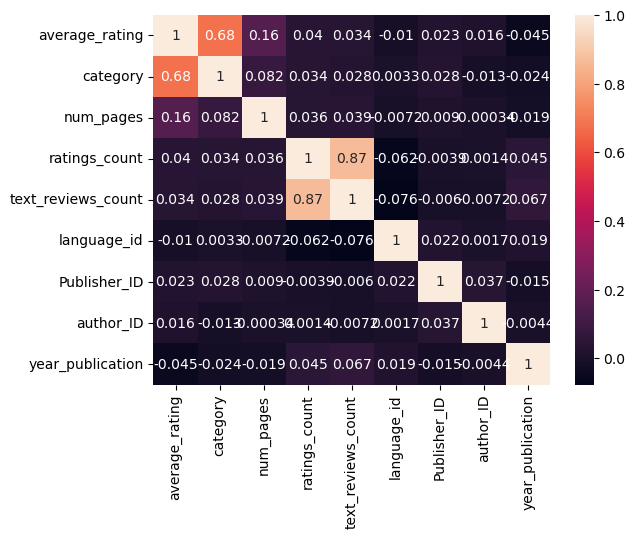

In [36]:
#Significant correlations from heatmap
sns.heatmap(df_processed.corr(),annot=True)

## Model training and evaluation

#### SMOTE oversampling and undersampling

In [37]:
X = df_processed.loc[:,['num_pages','ratings_count','text_reviews_count','Publisher_ID']].values
y = df_processed.category.values

In [38]:
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter

# define pipeline
over = SMOTE(sampling_strategy={1:10000, 2:9000, 4:9500},random_state=1)
under = RandomUnderSampler(sampling_strategy={3:8700},random_state=1)
steps_tr = [('o', over),('u',under)]
pipeline = Pipeline(steps=steps_tr)

# transform the dataset
X_processed, y_processed = pipeline.fit_resample(X, y)

#transform X_processed and y_processed into dataframes
X_model=pd.DataFrame(X_processed,columns=['num_pages','ratings_count','text_reviews_count','Publisher_ID'])
X_model['index'] = X_model.index
y_model=pd.DataFrame(y_processed,columns=['category'])
y_model['index'] = y_model.index


#concatenate X_model and y_model
df_model=pd.merge(X_model,y_model,left_on='index',right_on='index')
df_model=df_model.drop(columns=['index'])


# summarize the new class distribution
counter_pr = Counter(y)
counter = Counter(y_processed)
print('Before Smote :', counter_pr)
print('After Smote :', counter)

Before Smote : Counter({3: 10142, 2: 688, 4: 188, 1: 79})
After Smote : Counter({1: 10000, 4: 9500, 2: 9000, 3: 8700})


In [39]:
#Dataframe used to feed the model
df_model

,num_pages,ratings_count,text_reviews_count,Publisher_ID,category
0,360,411,65,1283,1
1,80,5,0,418,1
2,664,0,0,1181,1
3,196,9,2,1135,1
4,96,3,1,288,1
...,...,...,...,...,...
37195,755,85,1,2284,4
37196,100,125,12,799,4
37197,185,20,1,2278,4
37198,879,137,6,2238,4


##### Train/Test Split 

In [40]:
from sklearn.model_selection import train_test_split
df_train, df_test = train_test_split(df_model,test_size = 0.2)
X_train = df_train.loc[:,['num_pages','ratings_count','text_reviews_count','Publisher_ID']].values
y_train = df_train.category.values
X_test = df_test.loc[:,['num_pages','ratings_count','text_reviews_count','Publisher_ID']].values
y_test = df_test.category.values

#### Model 1 : Decision Tree Classifier

In [41]:
from sklearn import tree
from sklearn.metrics import classification_report

clf_DTC = tree.DecisionTreeClassifier(random_state=1)
clf_DTC = clf_DTC.fit(X_train, y_train)
y_test_predicted_DTC=clf_DTC.predict(X_test)

report_decision_tree =classification_report(y_true=y_test, y_pred=y_test_predicted_DTC)
print(report_decision_tree)

              precision    recall  f1-score   support

           1       0.94      0.95      0.94      2038
           2       0.79      0.81      0.80      1823
           3       0.74      0.70      0.72      1685
           4       0.91      0.91      0.91      1894

    accuracy                           0.85      7440
   macro avg       0.84      0.84      0.84      7440
weighted avg       0.85      0.85      0.85      7440



#### Model 2 : Random Forest Classifier 

In [42]:
from sklearn.ensemble import RandomForestClassifier
clf_RFC = RandomForestClassifier(random_state=1,n_estimators=30)
clf_RFC = clf_RFC.fit(X_train, y_train)

y_test_predicted_RFC= clf_RFC.predict(X_test)
report_random_forest =classification_report(y_true=y_test, y_pred=y_test_predicted_RFC)
print(report_random_forest)

              precision    recall  f1-score   support

           1       0.94      0.97      0.96      2038
           2       0.85      0.88      0.86      1823
           3       0.84      0.75      0.79      1685
           4       0.92      0.95      0.93      1894

    accuracy                           0.89      7440
   macro avg       0.89      0.89      0.89      7440
weighted avg       0.89      0.89      0.89      7440



#### Model 3 : K Neighbors Classifier 

In [43]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3)
neigh = neigh.fit(X_train, y_train)

y_test_predicted_neigh = neigh.predict(X_test)
report_k_neighbors = classification_report(y_true=y_test, y_pred=y_test_predicted_neigh)
print(report_k_neighbors)

              precision    recall  f1-score   support

           1       0.87      0.95      0.91      2038
           2       0.79      0.88      0.84      1823
           3       0.85      0.60      0.70      1685
           4       0.87      0.92      0.89      1894

    accuracy                           0.85      7440
   macro avg       0.85      0.84      0.84      7440
weighted avg       0.85      0.85      0.84      7440



#### Model 4 : Support Vector Machine

In [44]:
from sklearn import svm
clf_svm = svm.SVC(random_state=1)
clf_svm = clf_svm.fit(X_train, y_train)

y_test_predicted_svm= clf_svm.predict(X_test)
report_svm =classification_report(y_true=y_test, y_pred=y_test_predicted_svm)
print(report_svm)

              precision    recall  f1-score   support

           1       0.31      0.96      0.47      2038
           2       0.31      0.02      0.04      1823
           3       0.42      0.14      0.21      1685
           4       0.36      0.10      0.16      1894

    accuracy                           0.33      7440
   macro avg       0.35      0.31      0.22      7440
weighted avg       0.35      0.33      0.23      7440



#### Model 5 : MLP Classifier 

In [45]:
from sklearn.neural_network import MLPClassifier
clf_mlp = MLPClassifier(random_state=1,solver='lbfgs', alpha=1e-9, hidden_layer_sizes=(5, 2),max_iter=800)
clf_mlp = clf_mlp.fit(X_train, y_train)

y_test_predicted_mlp = clf_mlp.predict(X_test)
report_mlp = classification_report(y_true=y_test, y_pred=y_test_predicted_mlp,zero_division=0)
print(report_mlp)

              precision    recall  f1-score   support

           1       0.48      0.73      0.58      2038
           2       0.00      0.00      0.00      1823
           3       0.33      0.85      0.48      1685
           4       0.50      0.00      0.00      1894

    accuracy                           0.39      7440
   macro avg       0.33      0.40      0.26      7440
weighted avg       0.33      0.39      0.27      7440



#### Cross validation with Random Forest Classifier

In [46]:
#before cross validation 
from sklearn.metrics import f1_score
f1_score=f1_score(y_test, y_test_predicted_RFC,average='weighted',zero_division=0)
print('mean f1 score without cross validation :', f1_score)

mean f1 score without cross validation : 0.8916754735171101


#### Confusion Matrix

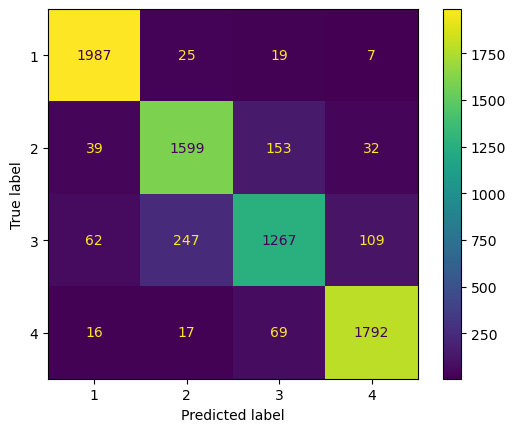

In [47]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_test_predicted_RFC, labels=clf_RFC.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf_RFC.classes_)
disp.plot()
plt.show()

In [48]:
#cross validation 

from numpy import mean
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_validate
from sklearn.model_selection import RepeatedStratifiedKFold

over2 = SMOTE(sampling_strategy={1:10000, 2:9000, 4:9500},random_state=1,k_neighbors=1)
under2 = RandomUnderSampler(sampling_strategy={3:8700},random_state=1)
model = RandomForestClassifier(random_state=1,n_estimators=30)
steps_tr2 = [('ov', over2),('un',under2),('model',model)]
pipeline2 = Pipeline(steps=steps_tr2)

cv2 = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)  
scores_f1 = cross_validate(pipeline2, X, y,cv=cv2, n_jobs=-1, scoring="f1_weighted") 
print('mean of f1 score after cross validation:' ,mean(scores_f1['test_score']))

mean of f1 score after cross validation: 0.8432525303159983
